In [14]:
pip install pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import pandas as pd

# Load dataset
df = pd.read_csv("aiml.csv", encoding='latin1')  # Change path if needed

# Display basic info
print("----- Original Data Info -----")
df.info()

# Check for duplicates and missing values
print("\nNumber of duplicate rows:", df.duplicated().sum())
print("\nMissing values per column:\n", df.isnull().sum())


----- Original Data Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Impressions     766 non-null    float64
 1   From Home       771 non-null    float64
 2   From Hashtags   769 non-null    float64
 3   From Explore    773 non-null    float64
 4   From Other      766 non-null    float64
 5   Saves           764 non-null    float64
 6   Comments        775 non-null    float64
 7   Shares          767 non-null    float64
 8   Likes           765 non-null    float64
 9   Profile Visits  779 non-null    float64
 10  Follows         774 non-null    float64
 11  Caption         801 non-null    object 
 12  Hashtags        801 non-null    object 
 13  Topic           801 non-null    object 
dtypes: float64(11), object(3)
memory usage: 87.7+ KB

Number of duplicate rows: 0

Missing values per column:
 Impressions       35
From Home  

In [19]:
# Remove duplicate rows (keep first occurrence)
df.drop_duplicates(inplace=True)

# Fill missing values
# → Numeric columns: replace with mean
# → Categorical columns: replace with mode
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.mean()))
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

# Display post-cleaning information
print("\n----- After Cleaning -----")
df.info()
print("\nDuplicate rows after cleaning:", df.duplicated().sum())
print("\nTotal null values after cleaning:", df.isnull().sum().sum())
print("\nSample of cleaned data:")
print(df.head())
print("\nDataset shape:", df.shape)




----- After Cleaning -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Impressions     801 non-null    float64
 1   From Home       801 non-null    float64
 2   From Hashtags   801 non-null    float64
 3   From Explore    801 non-null    float64
 4   From Other      801 non-null    float64
 5   Saves           801 non-null    float64
 6   Comments        801 non-null    float64
 7   Shares          801 non-null    float64
 8   Likes           801 non-null    float64
 9   Profile Visits  801 non-null    float64
 10  Follows         801 non-null    float64
 11  Caption         801 non-null    object 
 12  Hashtags        801 non-null    object 
 13  Topic           801 non-null    object 
dtypes: float64(11), object(3)
memory usage: 87.7+ KB

Duplicate rows after cleaning: 0

Total null values after cleaning: 0

Sample of cleaned dat

In [20]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Create a copy of the original dataframe for scaling
df_scaled = df.copy()

# Fit and transform numeric columns
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Display summary statistics after scaling
print("\n----- After Standardization -----")
print(df_scaled.describe())

# Optionally save the standardized dataset
df_scaled.to_csv("Standardized_Instagram_Data.csv", index=False)
print("\nStandardized dataset saved as 'Standardized_Instagram_Data.csv'")



----- After Standardization -----
        Impressions     From Home  From Hashtags  From Explore    From Other  \
count  8.010000e+02  8.010000e+02   8.010000e+02  8.010000e+02  8.010000e+02   
mean   5.765952e-17  1.108837e-18   6.985673e-17 -1.330604e-17 -4.435348e-17   
std    1.000625e+00  1.000625e+00   1.000625e+00  1.000625e+00  1.000625e+00   
min   -5.973963e-01 -9.953800e-01  -1.153968e+00 -3.824258e-01 -6.233820e-01   
25%   -4.281855e-01 -3.653833e-01  -6.796460e-01 -3.303434e-01 -4.528517e-01   
50%   -3.358346e-01 -1.623175e-01  -2.431193e-01 -2.558620e-01 -2.969257e-01   
75%    5.630939e-02  6.636179e-02   3.590653e-01 -9.890231e-02  3.994152e-02   
max    1.057527e+01  7.312313e+00   5.748399e+00  6.939491e+00  1.030140e+01   

              Saves      Comments        Shares         Likes  Profile Visits  \
count  8.010000e+02  8.010000e+02  8.010000e+02  8.010000e+02    8.010000e+02   
mean  -1.330604e-17 -8.870696e-18 -6.431254e-17 -4.435348e-17   -6.653022e-17   
s

In [21]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


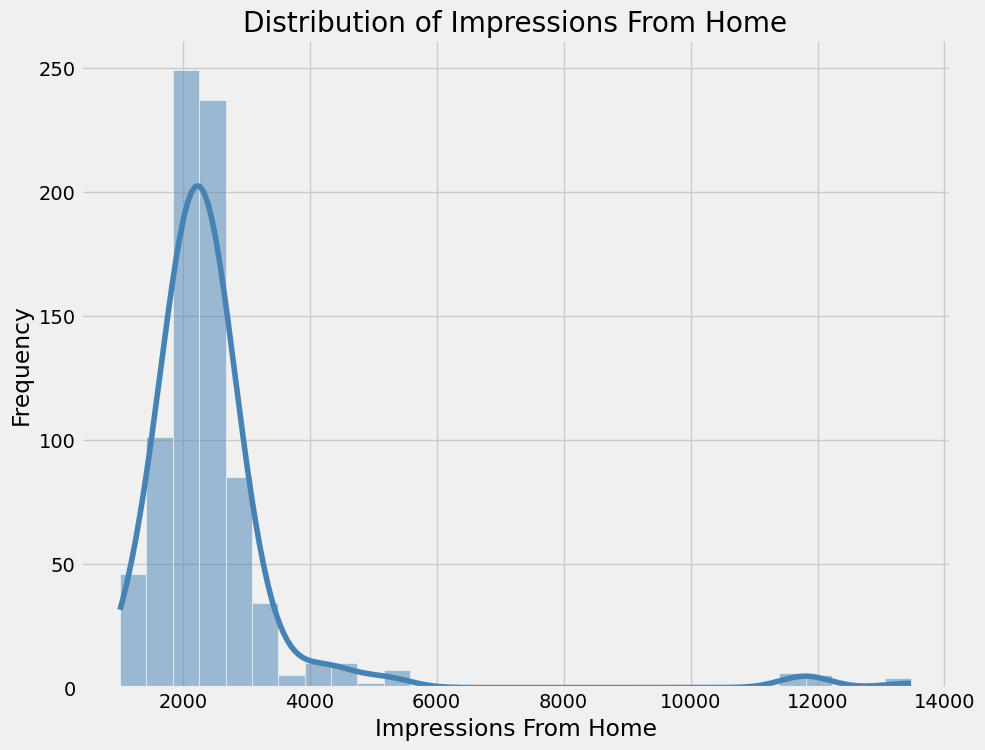

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")

# Use the original cleaned data (not scaled)
sns.histplot(df['From Home'], bins=30, kde=True, color='steelblue')

plt.xlabel("Impressions From Home")
plt.ylabel("Frequency")
plt.show()


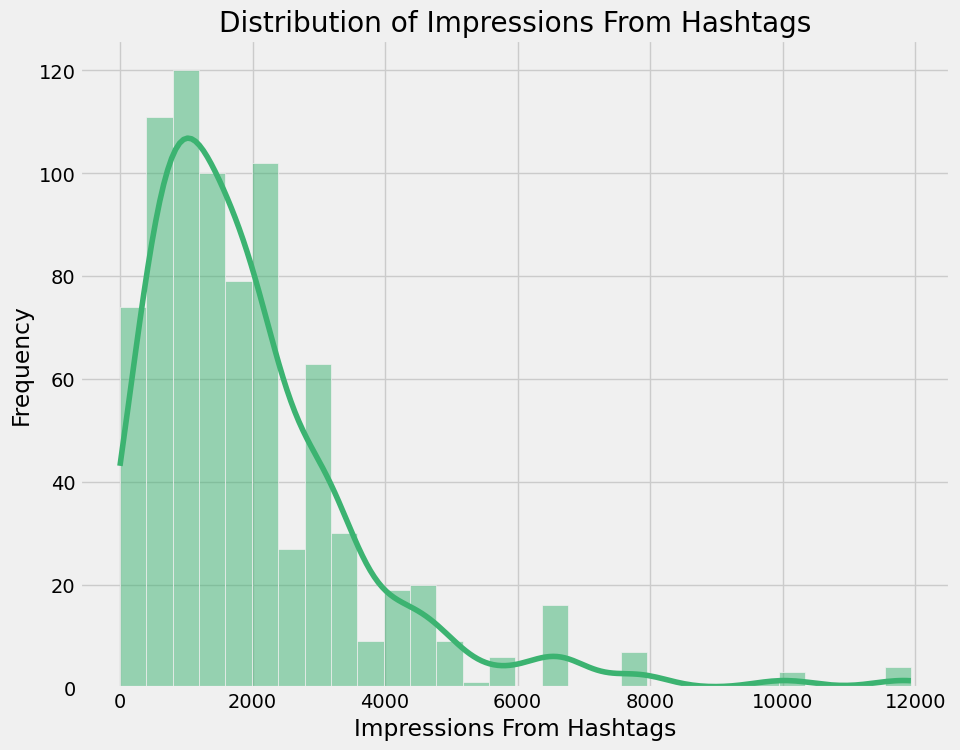

In [23]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Hashtags")

# Plot histogram with KDE curve
sns.histplot(df['From Hashtags'], bins=30, kde=True, color='mediumseagreen')

plt.xlabel("Impressions From Hashtags")
plt.ylabel("Frequency")
plt.show()


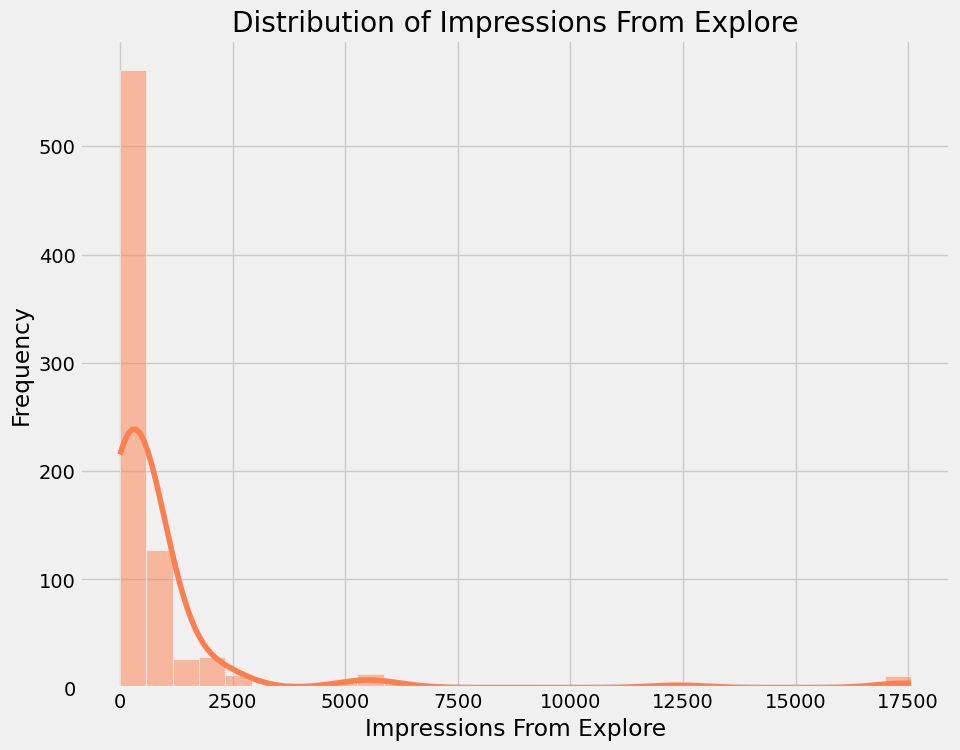

In [24]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Explore")

# Plot histogram with KDE for smoother visualization
sns.histplot(df['From Explore'], bins=30, kde=True, color='coral')

plt.xlabel("Impressions From Explore")
plt.ylabel("Frequency")
plt.show()



In [25]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


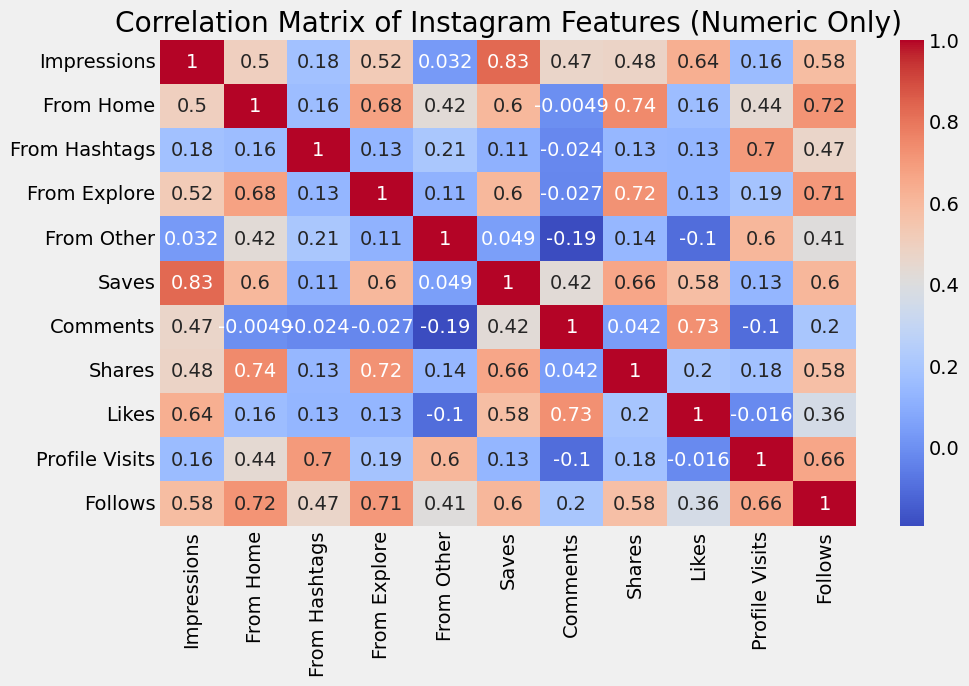


Top Features Most Correlated with Reach (Impressions):

Impressions       1.000000
Saves             0.831521
Likes             0.635818
Follows           0.582292
From Explore      0.522638
From Home         0.500606
Shares            0.475101
Comments          0.467246
From Hashtags     0.179003
Profile Visits    0.155171
From Other        0.032116
Name: Impressions, dtype: float64


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# -------------------------------
# 🔹 Correlation Heatmap (Numeric Only)
# -------------------------------
numeric_df = df_scaled.select_dtypes(include=['int64', 'float64'])  # only numeric columns

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=True)
plt.title("Correlation Matrix of Instagram Features (Numeric Only)")
plt.show()

# Display top correlations with Reach
corr = numeric_df.corr()['Impressions'].sort_values(ascending=False)
print("\nTop Features Most Correlated with Reach (Impressions):\n")
print(corr)


Using 10 numeric features for training.

===== TOP 5 IMPORTANT FEATURES =====
     Feature  Importance
4      Saves    0.609995
7      Likes    0.189854
5   Comments    0.090220
9    Follows    0.028259
0  From Home    0.022354


C:\Users\Srikeerthana\AppData\Local\Temp\ipykernel_15984\3664425582.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5, x="Importance", y="Feature", palette="viridis")


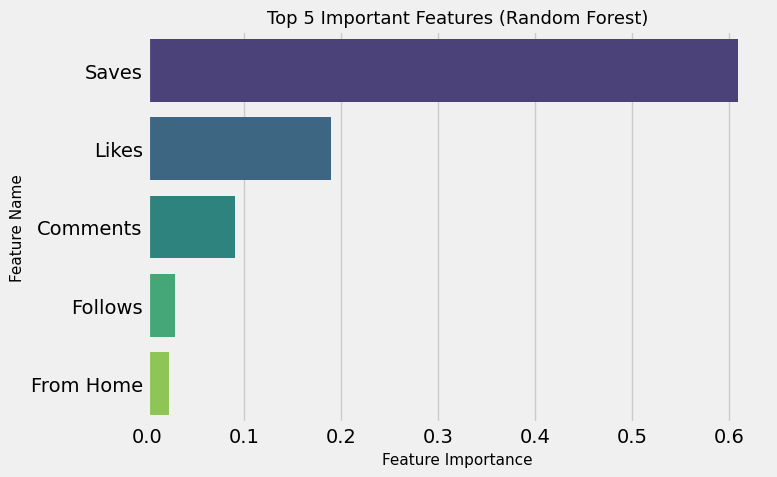

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

y = df["Impressions"]
X = df.drop(columns=["Impressions"])

# ==========================================
# 3. Split data into training and testing sets
# ==========================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# ==========================================
# 1. Keep only numeric features for training
# ==========================================
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])

print(f"Using {X_train_numeric.shape[1]} numeric features for training.")

# ==========================================
# 2. Train Random Forest Model
# ==========================================
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train_numeric, y_train)

# ==========================================
# 3. Get Feature Importances
# ==========================================
importances = rf.feature_importances_
feature_names = X_train_numeric.columns

# Create DataFrame
feat_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})

# Sort by importance
feat_df = feat_df.sort_values(by="Importance", ascending=False)

# Select Top 5
top5 = feat_df.head(5)

print("\n===== TOP 5 IMPORTANT FEATURES =====")
print(top5)

# ==========================================
# 4. Visualization
# ==========================================
plt.figure(figsize=(8, 5))
sns.barplot(data=top5, x="Importance", y="Feature", palette="viridis")
plt.title("Top 5 Important Features (Random Forest)", fontsize=13)
plt.xlabel("Feature Importance", fontsize=11)
plt.ylabel("Feature Name", fontsize=11)
plt.tight_layout()
plt.show()


Training XGBoost...
Training Random Forest...
XGBoost MSE: 40777238.53001193
Random Forest MSE: 35540867.17030659


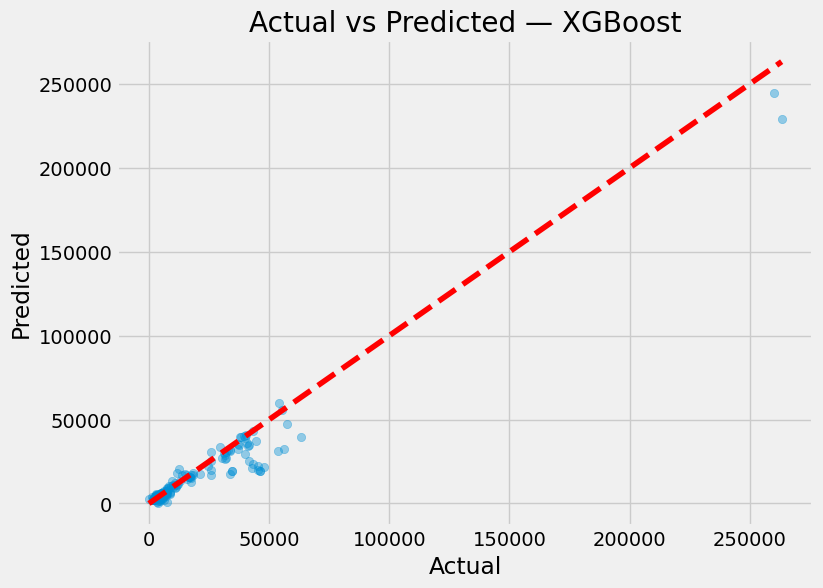

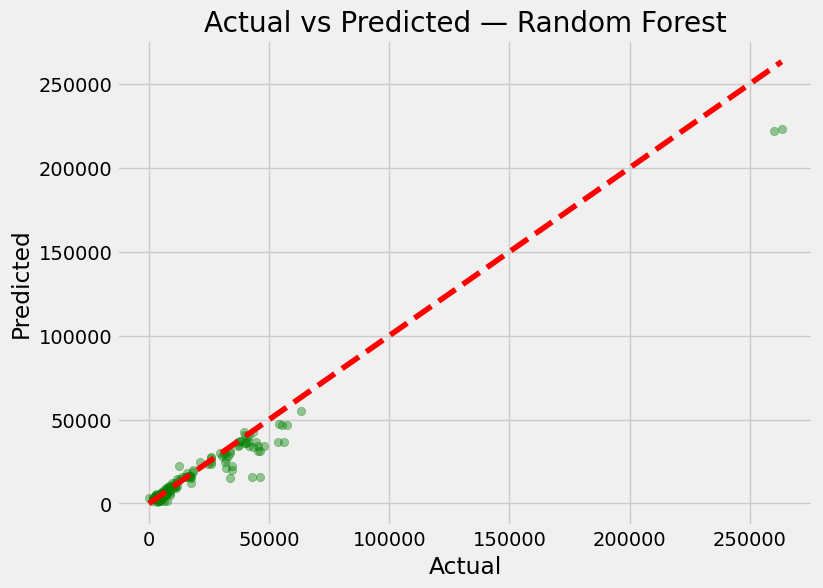

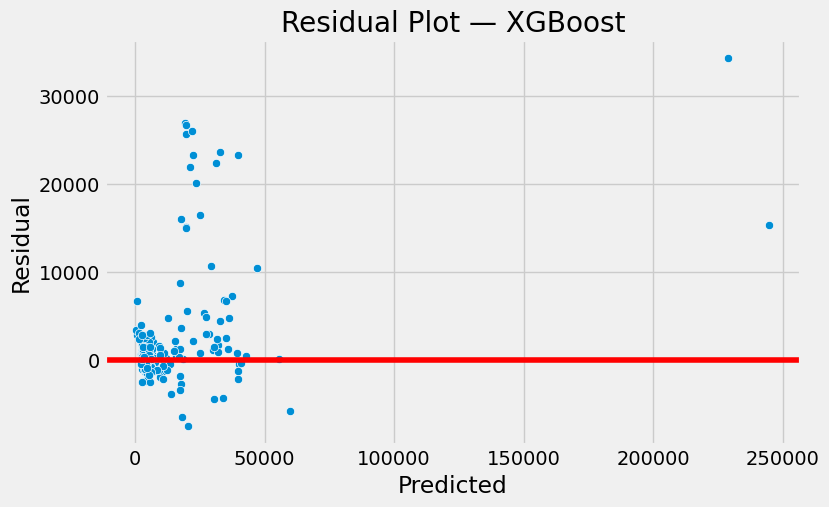

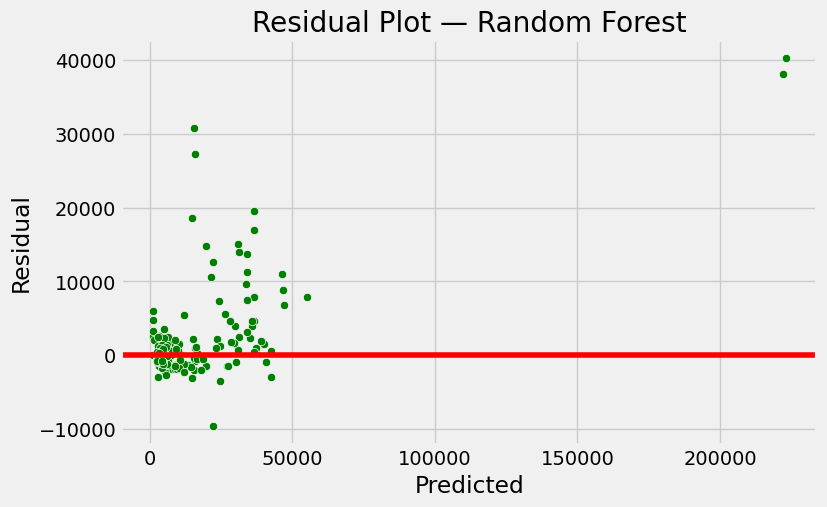

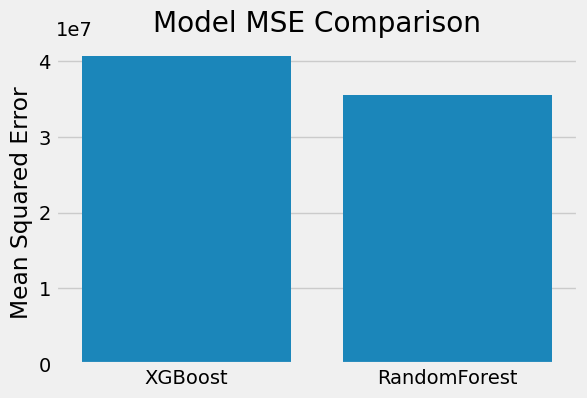

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor

# ----------------------------------------
# LOAD DATA
# ----------------------------------------
df = pd.read_csv("aiml.csv", encoding="latin1")

# ----------------------------------------
# CLEAN TARGET COLUMN
# ----------------------------------------
df["Impressions"] = pd.to_numeric(df["Impressions"], errors="coerce")
df["Impressions"] = df["Impressions"].replace([np.inf, -np.inf], np.nan)
df.dropna(subset=["Impressions"], inplace=True)

# LOG TRANSFORM TARGET
df["Log_Impressions"] = np.log1p(df["Impressions"])

# ----------------------------------------
# CLEAN TEXT
# ----------------------------------------
df["Caption"] = df["Caption"].astype(str).fillna("")
df["Topic"] = df["Topic"].astype(str).fillna("")
df["Text"] = df["Caption"] + " " + df["Topic"]
df = df.drop(columns=["Caption", "Topic"])

# ----------------------------------------
# FEATURES
# ----------------------------------------
y = df["Log_Impressions"]
X = df.drop(columns=["Impressions", "Log_Impressions"])

numeric_cols = [
    "From Home","From Hashtags","From Explore","From Other",
    "Saves","Comments","Shares","Likes","Profile Visits","Follows"
]

# ----------------------------------------
# TRAIN–TEST SPLIT
# ----------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ----------------------------------------
# PREPROCESSOR (IMPUTE + SCALE + TFIDF)
# ----------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("impute", SimpleImputer(strategy="median")),
            ("scale", StandardScaler())
        ]), numeric_cols),

        ("text", TfidfVectorizer(max_features=5000, ngram_range=(1,2)), "Text")
    ],
    remainder="drop"
)

# ----------------------------------------
# MODELS
# ----------------------------------------
xgb_model = XGBRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    eval_metric="rmse"
)

rf_model = RandomForestRegressor(
    n_estimators=400,
    random_state=42
)

# ----------------------------------------
# PIPELINES
# ----------------------------------------
xgb_pipe = Pipeline([
    ("prep", preprocessor),
    ("model", xgb_model)
])

rf_pipe = Pipeline([
    ("prep", preprocessor),
    ("model", rf_model)
])

# ----------------------------------------
# TRAIN BOTH MODELS
# ----------------------------------------
print("Training XGBoost...")
xgb_pipe.fit(X_train, y_train)

print("Training Random Forest...")
rf_pipe.fit(X_train, y_train)

# ----------------------------------------
# PREDICTIONS
# ----------------------------------------
y_pred_log_xgb = xgb_pipe.predict(X_test)
y_pred_log_rf = rf_pipe.predict(X_test)

y_pred_xgb = np.expm1(y_pred_log_xgb)
y_pred_rf = np.expm1(y_pred_log_rf)
y_test_real = np.expm1(y_test)

# ----------------------------------------
# MSE RESULTS
# ----------------------------------------
mse_xgb = mean_squared_error(y_test_real, y_pred_xgb)
mse_rf  = mean_squared_error(y_test_real, y_pred_rf)

print("XGBoost MSE:", mse_xgb)
print("Random Forest MSE:", mse_rf)

# ----------------------------------------
# GRAPHS
# ----------------------------------------

# ---------- 1. Actual vs Predicted (XGB) -----------
plt.figure(figsize=(8,6))
plt.scatter(y_test_real, y_pred_xgb, alpha=0.4)
plt.plot([y_test_real.min(), y_test_real.max()],
         [y_test_real.min(), y_test_real.max()], "r--")
plt.title("Actual vs Predicted — XGBoost")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# ---------- 2. Actual vs Predicted (RF) -----------
plt.figure(figsize=(8,6))
plt.scatter(y_test_real, y_pred_rf, alpha=0.4, color='green')
plt.plot([y_test_real.min(), y_test_real.max()],
         [y_test_real.min(), y_test_real.max()], "r--")
plt.title("Actual vs Predicted — Random Forest")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# ---------- 3. Residual Plot (XGB) -----------
residuals_xgb = y_test_real - y_pred_xgb
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_xgb, y=residuals_xgb)
plt.axhline(0, color="red")
plt.title("Residual Plot — XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.show()

# ---------- 4. Residual Plot (RF) -----------
residuals_rf = y_test_real - y_pred_rf
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_rf, y=residuals_rf, color="green")
plt.axhline(0, color="red")
plt.title("Residual Plot — Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.show()

# ---------- 5. Error Comparison Bar Chart -----------
plt.figure(figsize=(6,4))
sns.barplot(x=["XGBoost","RandomForest"], y=[mse_xgb,mse_rf])
plt.title("Model MSE Comparison")
plt.ylabel("Mean Squared Error")
plt.show()


Training XGBoost Regressor...

XGBoost Regression Performance:
Mean Squared Error (MSE): 40777238.53
R² Score: 0.9450


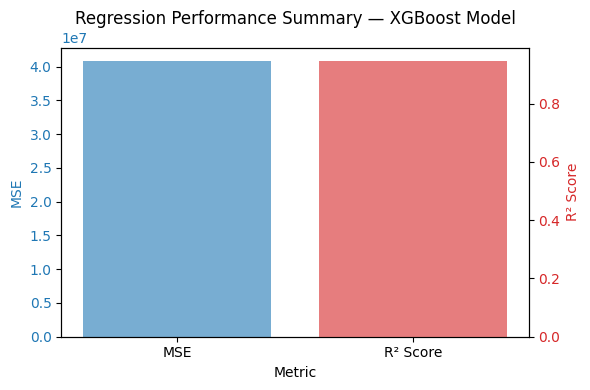

In [4]:
# --------------------------------------------
#  Import necessary libraries
# --------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# --------------------------------------------
#  Load and prepare data
# --------------------------------------------
df = pd.read_csv("aiml.csv", encoding="latin1")

# Clean numeric + target
df["Impressions"] = pd.to_numeric(df["Impressions"], errors="coerce")
df["Impressions"] = df["Impressions"].replace([np.inf, -np.inf], np.nan)
df.dropna(subset=["Impressions"], inplace=True)

df["Log_Impressions"] = np.log1p(df["Impressions"])

# Combine text columns
df["Caption"] = df["Caption"].astype(str).fillna("")
df["Topic"] = df["Topic"].astype(str).fillna("")
df["Text"] = df["Caption"] + " " + df["Topic"]

# Features and target
y = df["Log_Impressions"]
X = df.drop(columns=["Impressions", "Log_Impressions", "Caption", "Topic"])

numeric_cols = [
    "From Home","From Hashtags","From Explore","From Other",
    "Saves","Comments","Shares","Likes","Profile Visits","Follows"
]

# --------------------------------------------
#  Split data
# --------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# --------------------------------------------
#  Preprocessing pipeline
# --------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("impute", SimpleImputer(strategy="median")),
            ("scale", StandardScaler())
        ]), numeric_cols),
        ("text", TfidfVectorizer(max_features=5000, ngram_range=(1,2)), "Text")
    ],
    remainder="drop"
)

# --------------------------------------------
#  XGBoost model pipeline
# --------------------------------------------
xgb_model = XGBRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    eval_metric="rmse"
)

xgb_pipe = Pipeline([
    ("prep", preprocessor),
    ("model", xgb_model)
])

# Train the model
print("Training XGBoost Regressor...")
xgb_pipe.fit(X_train, y_train)

# --------------------------------------------
#  Evaluate model performance
# --------------------------------------------
y_pred_log_xgb = xgb_pipe.predict(X_test)
y_pred_xgb = np.expm1(y_pred_log_xgb)
y_test_real = np.expm1(y_test)

mse_xgb = mean_squared_error(y_test_real, y_pred_xgb)
r2_xgb = r2_score(y_test_real, y_pred_xgb)

print("\nXGBoost Regression Performance:")
print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"R² Score: {r2_xgb:.4f}")

# --------------------------------------------
#  Plot regression performance summary
# --------------------------------------------
fig, ax1 = plt.subplots(figsize=(6, 4))

color = 'tab:blue'
ax1.set_xlabel("Metric")
ax1.set_ylabel("MSE", color=color)
ax1.bar(["MSE"], [mse_xgb], color=color, alpha=0.6, label="MSE")
ax1.tick_params(axis='y', labelcolor=color)

# Create a twin axis for R²
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel("R² Score", color=color)
ax2.bar(["R² Score"], [r2_xgb], color=color, alpha=0.6, label="R² Score")
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Regression Performance Summary — XGBoost Model")
fig.tight_layout()
plt.show()


In [31]:
def predict_impressions(
        from_home, from_hashtags, from_explore, from_other,
        saves, comments, shares, likes, profile_visits, follows,
        caption, topic
    ):

    # Combine caption + topic just like old pipeline
    text = str(caption) + " " + str(topic)

    new_data = pd.DataFrame([{
        "From Home": from_home,
        "From Hashtags": from_hashtags,
        "From Explore": from_explore,
        "From Other": from_other,
        "Saves": saves,
        "Comments": comments,
        "Shares": shares,
        "Likes": likes,
        "Profile Visits": profile_visits,
        "Follows": follows,
        "Text": text
    }])

    pred_log = pipe.predict(new_data)[0]
    pred = np.expm1(pred_log)
    return pred


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler
# from sklearn.feature_extraction.text import TfidfVectorizer

# # ==========================================
# # 1. Normalize & Prepare Data
# # ==========================================
# X_train.columns = X_train.columns.str.lower()
# X_test.columns = X_test.columns.str.lower()

# # Auto-detect text columns
# caption_col = next((c for c in X_train.columns if "caption" in c.lower()), None)
# topic_col = next((c for c in X_train.columns if "topic" in c.lower()), None)

# # Combine or fallback
# if caption_col and topic_col:
#     X_train["text"] = X_train[caption_col].astype(str) + " " + X_train[topic_col].astype(str)
#     X_test["text"] = X_test[caption_col].astype(str) + " " + X_test[topic_col].astype(str)
# elif caption_col:
#     X_train["text"] = X_train[caption_col].astype(str)
#     X_test["text"] = X_test[caption_col].astype(str)
# elif topic_col:
#     X_train["text"] = X_train[topic_col].astype(str)
#     X_test["text"] = X_test[topic_col].astype(str)
# else:
#     # ✅ Fallback: Add dummy text if both missing
#     X_train["text"] = "generic content"
#     X_test["text"] = "generic content"
#     print("⚠️ Warning: No caption/topic column found — using placeholder text.")

# # Ensure no blanks
# X_train["text"] = X_train["text"].replace("", "generic content")
# X_test["text"] = X_test["text"].replace("", "generic content")

# # ==========================================
# # 2. Define numeric and text columns
# # ==========================================
# numeric_features = X_train.select_dtypes(include=['number']).columns.tolist()
# text_feature = "text"

# # ==========================================
# # 3. Preprocessor + Pipeline
# # ==========================================
# preprocessor = ColumnTransformer(
#     transformers=[
#         ("num", StandardScaler(), numeric_features),
#         ("text", TfidfVectorizer(max_features=100), text_feature)
#     ],
#     remainder="drop"
# )

# pipe = Pipeline([
#     ("preprocess", preprocessor),
#     ("model", RandomForestRegressor(n_estimators=300, random_state=42))
# ])

# # ==========================================
# # 4. Train Model
# # ==========================================
# pipe.fit(X_train, y_train)

# # ==========================================
# # 5. Prediction Function
# # ==========================================
# def predict_impressions(
#         from_home, from_hashtags, from_explore, from_other,
#         saves, comments, shares, likes, profile_visits, follows,
#         caption="", topic=""
#     ):

#     text = str(caption) + " " + str(topic)
#     if text.strip() == "":
#         text = "generic content"

#     new_data = pd.DataFrame([{
#         "from home": from_home,
#         "from hashtags": from_hashtags,
#         "from explore": from_explore,
#         "from other": from_other,
#         "saves": saves,
#         "comments": comments,
#         "shares": shares,
#         "likes": likes,
#         "profile visits": profile_visits,
#         "follows": follows,
#         "text": text
#     }])

#     return pipe.predict(new_data)[0]

# # ==========================================
# # 6. Example Prediction
# # ==========================================
# pred = predict_impressions(
#     from_home=150000,
#     from_hashtags=35000,
#     from_explore=80000,
#     from_other=5000,
#     saves=10000,
#     comments=8000,
#     shares=3000,
#     likes=75000,
#     profile_visits=20000,
#     follows=5000,
#     caption="This post blew up instantly! 🔥🔥 Thanks for the crazy support!",
#     topic="Viral Trending Content"
# )

# print("Predicted Impressions:", pred)


⚠️ Warning: No caption/topic column found — using placeholder text.
Predicted Impressions: 12.364947480700874


In [33]:
# ================================
# FIX: Define and train `pipe`
# ================================
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor

# Make sure X_train, X_test, y_train, y_test exist
# If not, load/split your data before this

# --- Normalize column names for consistency ---
X_train.columns = X_train.columns.str.lower()
X_test.columns = X_test.columns.str.lower()

# --- Safely create text column ---
caption_col = next((c for c in X_train.columns if "caption" in c.lower()), None)
topic_col = next((c for c in X_train.columns if "topic" in c.lower()), None)

if caption_col and topic_col:
    X_train["text"] = X_train[caption_col].astype(str) + " " + X_train[topic_col].astype(str)
    X_test["text"] = X_test[caption_col].astype(str) + " " + X_test[topic_col].astype(str)
else:
    X_train["text"] = "generic content"
    X_test["text"] = "generic content"

# --- Identify numeric and text columns ---
numeric_features = X_train.select_dtypes(include=['number']).columns.tolist()
text_feature = "text"

# --- Build preprocessing and model pipeline ---
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("text", TfidfVectorizer(max_features=100), text_feature)
    ],
    remainder="drop"
)

pipe = Pipeline([
    ("preprocess", preprocessor),
    ("model", RandomForestRegressor(n_estimators=300, random_state=42))
])

# --- Train the model ---
pipe.fit(X_train, y_train)
print("✅ Model pipeline (`pipe`) trained and ready for prediction.")


✅ Model pipeline (`pipe`) trained and ready for prediction.


In [35]:
pred = predict_impressions(
    from_home=150000,         # A lot of home impressions
    from_hashtags=35000,
    from_explore=80000,
    from_other=5000,

    saves=10000,              # Very high saves
    comments=8000,            # Very high comments
    shares=3000,
    likes=75000,              # 🔥 VERY HIGH LIKE COUNT
    profile_visits=20000,
    follows=5000,

    caption="This post blew up instantly! 🔥🔥 Thanks for the crazy support!",
    topic="Viral Trending Content"
)

print("Predicted Impressions:", pred)


ValueError: columns are missing: {'profile visits', 'from explore', 'follows', 'shares', 'text', 'saves', 'from home', 'from other', 'comments', 'likes', 'from hashtags'}